## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

!pip install keras

!pip install tensorflow

In [1]:
import numpy as np
import keras

from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

In [3]:
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

In [4]:
train_images = train_imagef.reshape((-1, 784))
test_images = test_imagef.reshape((-1, 784))

In [5]:
print(train_images.shape)
print(test_images.shape) 

(60000, 784)
(10000, 784)


In [6]:
n=0
train_imagef[n,:,:].shape

(28, 28)

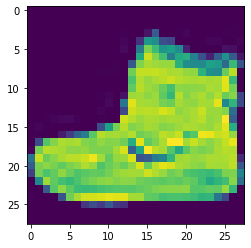

9


In [7]:
plt.imshow(train_imagef[n,:,:])
plt.show()
print(train_labelf[n])

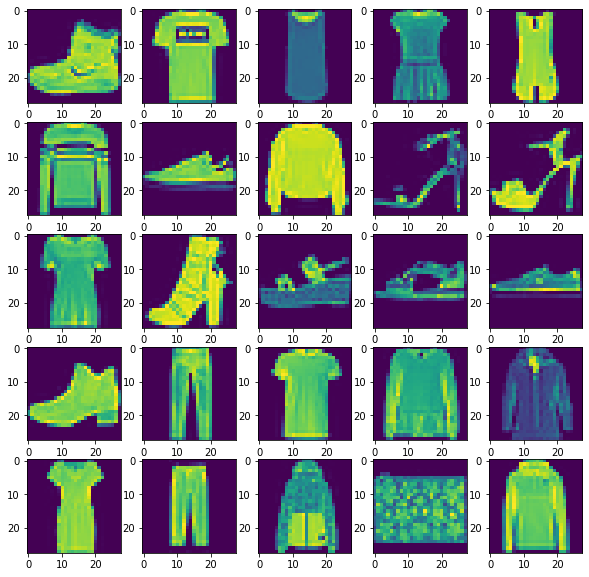

In [8]:
plt.figure(figsize = (10, 10))
for i in range(25):
    image = train_imagef[i,:,:]
    image = np.array(image)
    image = image.reshape((28,28))
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
plt.show() 

In [9]:
# количество элементов классов на test
unique, counts = np.unique(np.array(train_labelf), return_counts=True)
print(np.asarray((unique, counts)))

[[   0    1    2    3    4    5    6    7    8    9]
 [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]]


In [10]:
# количество элементов классов на train
unique, counts = np.unique(np.array(test_labelf), return_counts=True)
print(np.asarray((unique, counts)))

[[   0    1    2    3    4    5    6    7    8    9]
 [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]]


In [11]:
# Модель 1
model1 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(110, activation='tanh'),
  Dense(100, activation='tanh'),
  Dense(10, activation='softmax'),
])

2022-05-26 14:48:03.728272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model1.compile(
    optimizer='adam', 
    loss=keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy']
) 

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [14]:
y_t = to_categorical( train_labelf)
y_tt = to_categorical(test_labelf)

In [15]:
y_pred = model1.predict(train_images[:5,:])

1/1 [==============================] - 0s 102ms/step


In [16]:
y_class = np.argmax(y_pred, axis=1)

In [17]:
model1.fit(  
  train_images[:,:],  # вход

  y_t[:,:],  # выход
  epochs=15,
  batch_size=1024, validation_split=0.2  # использовать 20 % данных для валидации
  , verbose = 0
)

In [18]:
model1.evaluate( 
  test_images,
  y_tt
)

313/313 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8746


[0.34955012798309326, 0.8745999932289124]

In [19]:
predictions = model1.predict(test_images[:5])

1/1 [==============================] - 0s 14ms/step


In [20]:
print(np.argmax(predictions, axis=1))

[9 2 1 1 6]


In [21]:
print(test_labelf[:5])

[9 2 1 1 6]


In [22]:
model1.save_weights('model_fashion_mnist.h5')

In [23]:
hh1 = model1.fit( 
  train_images,
  to_categorical(train_labelf),
  epochs=15,
  batch_size=1024, validation_split=0.2, verbose = 0
) 

In [24]:
model1.evaluate(
  test_images,
  to_categorical(test_labelf)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8792


[0.3798719346523285, 0.8791999816894531]

In [25]:
predictions = model1.predict(test_images[:5])

1/1 [==============================] - 0s 14ms/step


In [26]:
print(np.argmax(predictions, axis=1))

[9 2 1 1 6]


In [27]:
print(test_labelf[:5])

[9 2 1 1 6]


In [28]:
# Модель 2
model2 = Sequential([
  Dense(256, activation='tanh', input_shape=(784,)),
  Dense(220, activation='tanh'),
  Dense(200, activation='tanh'),
  Dense(10, activation='softmax')
])

In [29]:
model2.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
) 

In [30]:
hh2 = model2.fit( 
  train_images,
  to_categorical(train_labelf),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
) 

In [31]:
model2.evaluate(
  test_images,
  to_categorical(test_labelf)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8785


[0.3388764262199402, 0.8784999847412109]

In [32]:
predictions = model2.predict(test_images[:5])

1/1 [==============================] - 0s 48ms/step


In [33]:
print(np.argmax(predictions, axis=1))

[9 2 1 1 6]


In [34]:
print(test_labelf[:5])

[9 2 1 1 6]


In [35]:
# Модель 3
model3 = Sequential([
  Dense(512, activation='tanh', input_shape=(784,)),
  Dense(440, activation='tanh'),
  Dense(400, activation='tanh'),
  Dense(10, activation='softmax')
])

In [36]:
model3.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
) 

In [37]:
hh3 = model3.fit( 
  train_images,
  to_categorical(train_labelf),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
) 

In [38]:
model3.evaluate(
  test_images,
  to_categorical(test_labelf)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8815


[0.3344491422176361, 0.8815000057220459]

In [39]:
predictions = model3.predict(test_images[:5])

1/1 [==============================] - 0s 47ms/step


In [40]:
print(np.argmax(predictions, axis=1))

[9 2 1 1 6]


In [41]:
print(test_labelf[:5])

[9 2 1 1 6]


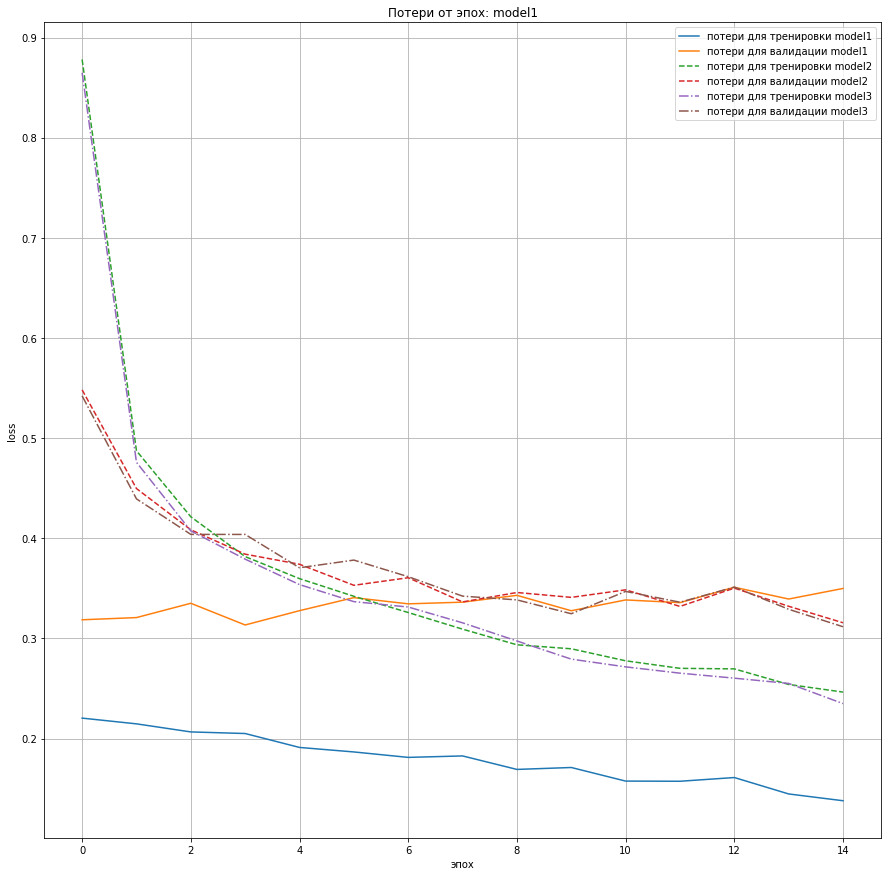

In [42]:
plt.figure(figsize=(15,15))
plt.plot(hh1.history['loss'], label = 'потери для тренировки model1')
plt.plot(hh1.history['val_loss'], label = 'потери для валидации model1')
plt.plot(hh2.history['loss'], label = 'потери для тренировки model2', linestyle = '--')
plt.plot(hh2.history['val_loss'], label = 'потери для валидации model2', linestyle = '--')
plt.plot(hh3.history['loss'], label = 'потери для тренировки model3', linestyle = '-.')
plt.plot(hh3.history['val_loss'], label = 'потери для валидации model3', linestyle = '-.')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох: model1')
plt.show()

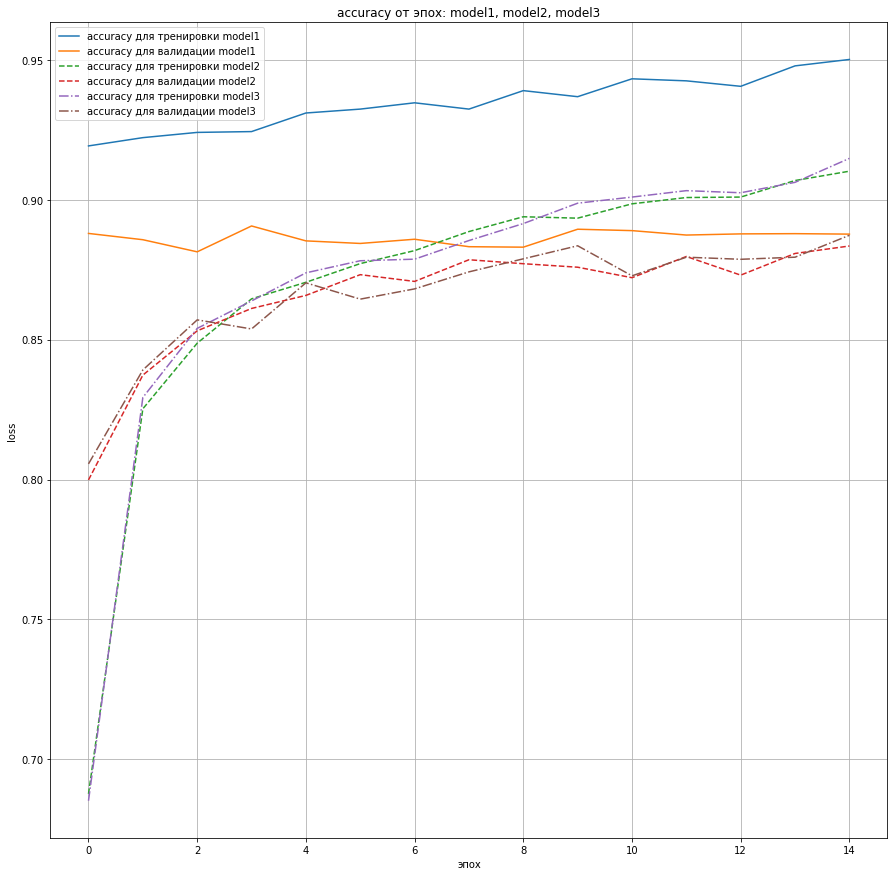

In [43]:
plt.figure(figsize=(15,15))
plt.plot(hh1.history['accuracy'], label = 'accuracy для тренировки model1')
plt.plot(hh1.history['val_accuracy'], label = 'accuracy для валидации model1')
plt.plot(hh2.history['accuracy'], label = 'accuracy для тренировки model2', linestyle = '--')
plt.plot(hh2.history['val_accuracy'], label = 'accuracy для валидации model2', linestyle = '--')
plt.plot(hh3.history['accuracy'], label = 'accuracy для тренировки model3', linestyle = '-.')
plt.plot(hh3.history['val_accuracy'], label = 'accuracy для валидации model3', linestyle = '-.')

plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('accuracy от эпох: model1, model2, model3')
plt.show()

In [44]:
print('model1:',
'\nloss: ', hh1.history['loss'][14],
'\naccuracy: ', hh1.history['accuracy'][14],
'\nval_loss: ', hh1.history['val_loss'][14],
'\nval_accuracy: ', hh1.history['val_accuracy'][14])

print('\n\nmodel2:',
'\nloss: ', hh2.history['loss'][14],
'\naccuracy: ', hh2.history['accuracy'][14],
'\nval_loss: ', hh2.history['val_loss'][14],
'\nval_accuracy: ', hh2.history['val_accuracy'][14])

print('\n\nmodel3:',
'\nloss: ', hh3.history['loss'][14],
'\naccuracy: ', hh3.history['accuracy'][14],
'\nval_loss: ', hh3.history['val_loss'][14],
'\nval_accuracy: ', hh3.history['val_accuracy'][14])

model1: 
loss:  0.13799111545085907 
accuracy:  0.950208306312561 
val_loss:  0.34993818402290344 
val_accuracy:  0.8877500295639038


model2: 
loss:  0.24646921455860138 
accuracy:  0.9102500081062317 
val_loss:  0.31569239497184753 
val_accuracy:  0.8834999799728394


model3: 
loss:  0.2349703162908554 
accuracy:  0.9148333072662354 
val_loss:  0.3117106258869171 
val_accuracy:  0.887333333492279


Увеличение ширины слоёв уменьшает ошибки в нашем случае на тесте, accuracy на тесте изменяеся незначительно.

In [45]:
model_2 = Sequential(name='model_2')
model_2.add(Dense( 128, activation='relu', input_shape=(784,)))  
for k in range(2):
    model_2.add(Dense(  17+(17-k)*10, activation='tanh')) 
model_2.add(Dense(10, activation='softmax')) 

In [46]:
model_2.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [47]:
hh2 = model_2.fit( 
  train_images,
  to_categorical(train_labelf),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
) 

In [48]:
model_2.evaluate(
  test_images,
  to_categorical(test_labelf)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8779


[0.34621480107307434, 0.8779000043869019]

In [49]:
model_3 = Sequential(name='model_3')
model_3.add(Dense( 128, activation='relu', input_shape=(784,)))  
for k in range(3):
    model_3.add(Dense(  14+(13-k)*10, activation='tanh')) 
model_3.add(Dense(10, activation='softmax')) 

In [50]:
model_3.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [51]:
hh3 = model_3.fit( 
  train_images,
  to_categorical(train_labelf),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
) 

In [52]:
model_3.evaluate(
  test_images,
  to_categorical(test_labelf)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8722


[0.3523891568183899, 0.8722000122070312]

In [53]:
model_5 = Sequential(name='model_5')
model_5.add(Dense( 128, activation='relu', input_shape=(784,)))  
for k in range(5):
    model_5.add(Dense(  11+(11-k)*10, activation='tanh')) 
model_5.add(Dense(10, activation='softmax')) 

In [54]:
model_5.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [55]:
hh5 = model_5.fit( 
  train_images,
  to_categorical(train_labelf),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
)  

In [56]:
model_5.evaluate(
  test_images,
  to_categorical(test_labelf)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8760


[0.3511873483657837, 0.8759999871253967]

In [57]:
model_10 = Sequential(name='model_10')
model_10.add(Dense( 128, activation='relu', input_shape=(784,)))  
for k in range(10):
    model_10.add(Dense(  10+(10-k)*10, activation='tanh')) 
model_10.add(Dense(10, activation='softmax')) 

In [58]:
model_10.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [59]:
hh10 = model_10.fit( 
  train_images,
  to_categorical(train_labelf),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
)  

In [60]:
model_10.evaluate(
  test_images,
  to_categorical(test_labelf)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.3835 - accuracy: 0.8733


[0.38347306847572327, 0.8733000159263611]

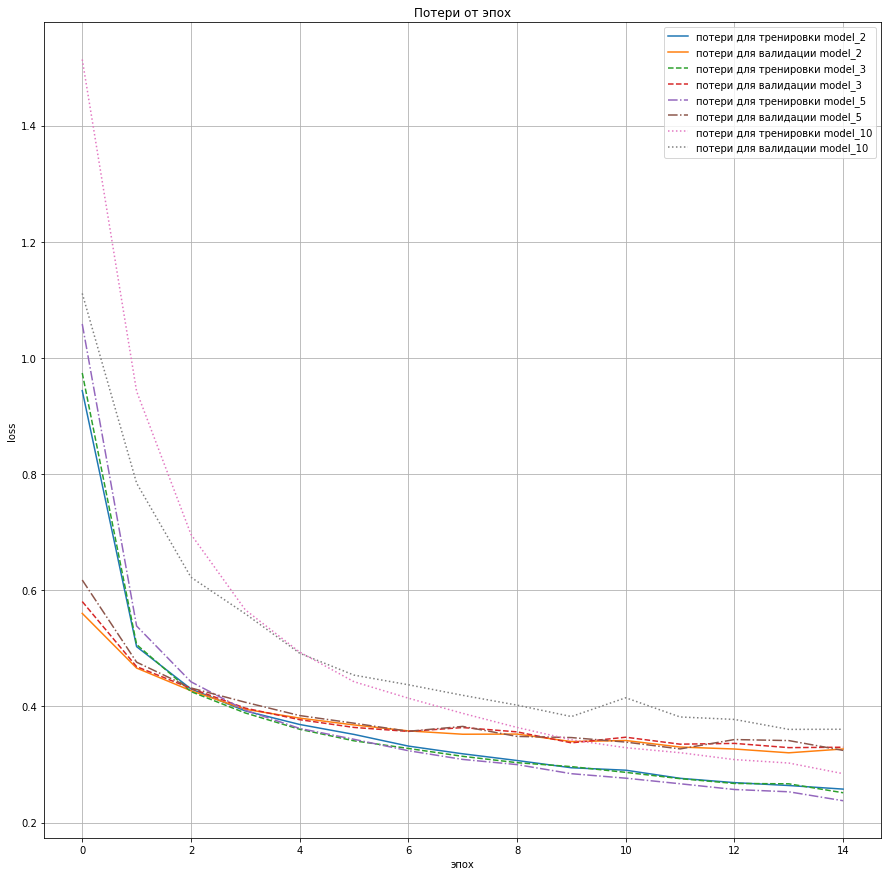

In [61]:
plt.figure(figsize=(15,15))
plt.plot(hh2.history['loss'], label = 'потери для тренировки model_2')
plt.plot(hh2.history['val_loss'], label = 'потери для валидации model_2')
plt.plot(hh3.history['loss'], label = 'потери для тренировки model_3', linestyle = '--')
plt.plot(hh3.history['val_loss'], label = 'потери для валидации model_3', linestyle = '--')
plt.plot(hh5.history['loss'], label = 'потери для тренировки model_5', linestyle = '-.')
plt.plot(hh5.history['val_loss'], label = 'потери для валидации model_5', linestyle = '-.')
plt.plot(hh10.history['loss'], label = 'потери для тренировки model_10', linestyle = ':')
plt.plot(hh10.history['val_loss'], label = 'потери для валидации model_10', linestyle = ':')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох')
plt.show()

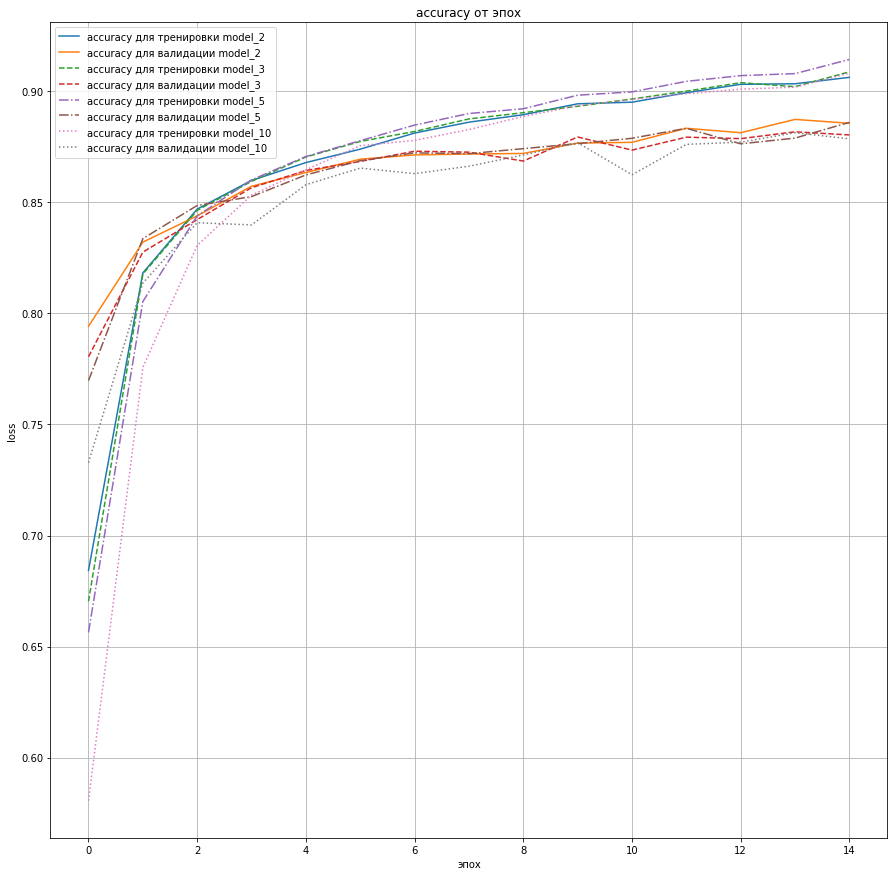

In [62]:
plt.figure(figsize=(15,15))
plt.plot(hh2.history['accuracy'], label = 'accuracy для тренировки model_2')
plt.plot(hh2.history['val_accuracy'], label = 'accuracy для валидации model_2')
plt.plot(hh3.history['accuracy'], label = 'accuracy для тренировки model_3', linestyle = '--')
plt.plot(hh3.history['val_accuracy'], label = 'accuracy для валидации model_3', linestyle = '--')
plt.plot(hh5.history['accuracy'], label = 'accuracy для тренировки model_5', linestyle = '-.')
plt.plot(hh5.history['val_accuracy'], label = 'accuracy для валидации model_5', linestyle = '-.')
plt.plot(hh10.history['accuracy'], label = 'accuracy для тренировки model_10', linestyle = ':')
plt.plot(hh10.history['val_accuracy'], label = 'accuracy для валидации model_10', linestyle = ':')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('accuracy от эпох')
plt.show()

In [63]:
print('model_2:',
'\nloss: ', hh2.history['loss'][14],
'\naccuracy: ', hh2.history['accuracy'][14],
'\nval_loss: ', hh2.history['val_loss'][14],
'\nval_accuracy: ', hh2.history['val_accuracy'][14])

print('\n\nmodel_3:',
'\nloss: ', hh3.history['loss'][14],
'\naccuracy: ', hh3.history['accuracy'][14],
'\nval_loss: ', hh3.history['val_loss'][14],
'\nval_accuracy: ', hh3.history['val_accuracy'][14])

print('\n\nmodel_5:',
'\nloss: ', hh5.history['loss'][14],
'\naccuracy: ', hh5.history['accuracy'][14],
'\nval_loss: ', hh5.history['val_loss'][14],
'\nval_accuracy: ', hh5.history['val_accuracy'][14])

print('\n\nmodel_10:',
'\nloss: ', hh10.history['loss'][14],
'\naccuracy: ', hh10.history['accuracy'][14],
'\nval_loss: ', hh10.history['val_loss'][14],
'\nval_accuracy: ', hh10.history['val_accuracy'][14])

model_2: 
loss:  0.25761735439300537 
accuracy:  0.90625 
val_loss:  0.32671234011650085 
val_accuracy:  0.8855833411216736


model_3: 
loss:  0.25133684277534485 
accuracy:  0.9087499976158142 
val_loss:  0.32969897985458374 
val_accuracy:  0.8803333044052124


model_5: 
loss:  0.2375987321138382 
accuracy:  0.914312481880188 
val_loss:  0.3242546021938324 
val_accuracy:  0.8859999775886536


model_10: 
loss:  0.284198135137558 
accuracy:  0.9081875085830688 
val_loss:  0.36069023609161377 
val_accuracy:  0.8785833120346069


Количество слоев улучшает качество модели, но можно заметить, что для большего количества слоев требуется больше эпох - в нашем случае для модели из 10 слоев 15 эпох уже недостаточно

In [64]:
model_3 = Sequential([
                  Dense(128, activation='tanh', input_shape=(784,)),
                  Dense(144, activation='tanh'),
                  Dense(134, activation='tanh'),
                  Dense(124, activation='tanh'),
                  Dense(10, activation='softmax')
])

In [65]:
model_3.save_weights('model_all_fashion_mnist.h5')

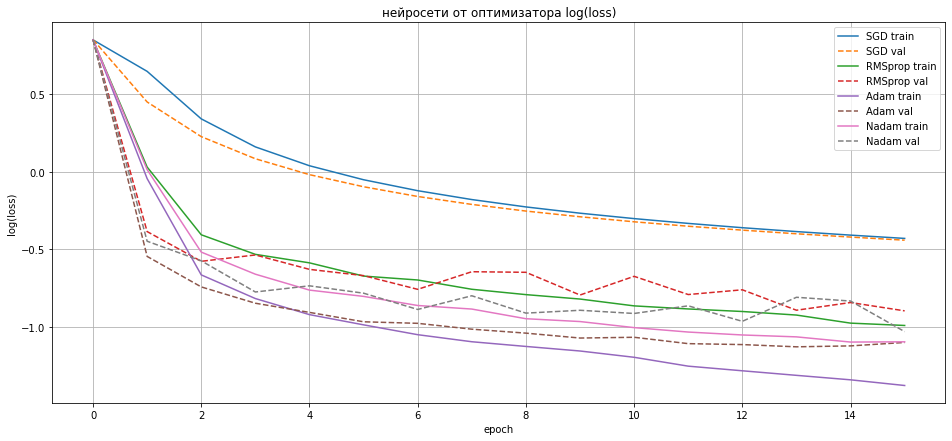

In [66]:
plt.figure(figsize=(16,7))
epochs = 15
epoch = np.arange(epochs+1)
for i_optim in ['SGD','RMSProp','adam','NAdam']:
    modeli = Sequential([
                      Dense(128, activation='tanh', input_shape=(784,)),
                      Dense(144, activation='tanh'),
                      Dense(134, activation='tanh'),
                      Dense(124, activation='tanh'),
                      Dense(10, activation='softmax')
    ])
    modeli.load_weights('model_all_fashion_mnist.h5')
    modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )
    hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labelf[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labelf[48000:]),verbose = 0)
    hh = modeli.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=2048, validation_split=0.2, verbose = 0
                  )
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()




In [67]:
 modeli.optimizer.get_config() 

{'name': 'Nadam',
 'learning_rate': 0.001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

Наиболее оптимальная модель - Nadam

In [68]:
i_optim = 'NAdam'

model = Sequential([
                  Dense(128, activation='tanh', input_shape=(784,)),
                  Dense(144, activation='tanh'),
                  Dense(134, activation='tanh'),
                  Dense(124, activation='tanh'),
                  Dense(10, activation='softmax')
])

In [69]:
model.load_weights('model_all_fashion_mnist.h5')

In [70]:
model.compile(
  optimizer=i_optim,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )


In [71]:
hh = model.fit(
              train_images,
              to_categorical(train_labelf),
              epochs=epochs,
              batch_size=2048, validation_split=0.2, verbose = 0
              )

1/1 [==============================] - 0s 54ms/step


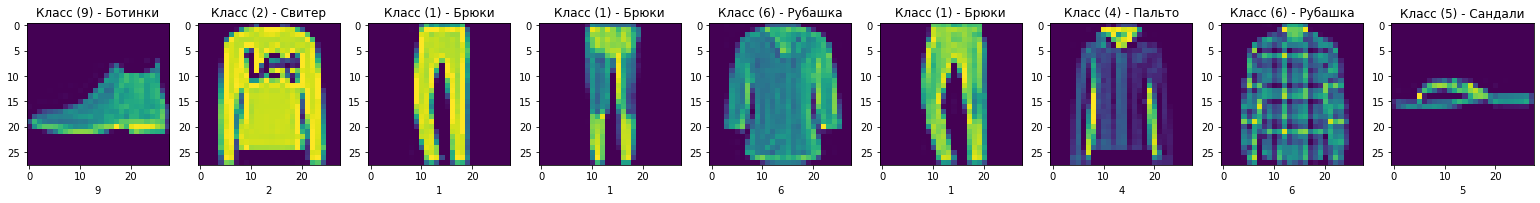

In [72]:
class_names = ['Футболка/топ', 'Брюки', 'Свитер', 'Платье', 'Пальто',
               'Сандали', 'Рубашка', 'Кросовки', 'Сумки', 'Ботинки']


N = 9
y_pred = model.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
    plt.subplot(1,N,i+1)
    plt.title('Класс (' + str(y_pred_class[i]) + ') - '+ class_names[y_pred_class[i]])
    plt.imshow(test_images[i,:].reshape(28,28))
    plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def recall(tp, fn):
    return tp/(tp + fn)

def precision(tp, fn):
    return tp/(tp + fp)

In [74]:
y_pred = model.predict(test_images)
print(y_pred.shape)
print(test_labelf.shape)
print(y_pred[0])
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]

313/313 [==============================] - 0s 992us/step
(10000, 10)
(10000,)
[4.4119541e-05 4.8664602e-05 3.4493252e-04 7.4420946e-05 3.3429184e-04
 1.5047696e-02 2.3959587e-04 3.0886726e-02 1.2299288e-03 9.5174962e-01]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [75]:
yy = y_pred
np.where(test_labelf != yy)[0].shape

(1561,)

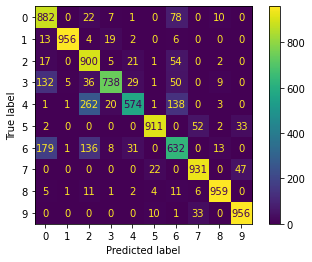

In [76]:
CM = confusion_matrix(test_labelf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))
disp.plot( values_format ='.3g')
plt.show()

In [77]:
class_recall = []
class_precision = []

for i in range(10):
    cm = 0
    for j in range(10):
        cm += CM[i][j]
    class_recall.append(CM[i][i]/cm)
    # print(f'Class {i}: Recall= {class_recall[i]},  CM[i][i]= {CM[i][i]}, TP+FN={cm}')
    
for j in range(10):
    cm = 0
    for i in range(10):
        cm += CM[i][j]
        
    class_precision.append(CM[j][j]/cm)
    # print(f'Class {j}: Precision= {class_precision[j]}, CM[j][j]= {CM[j][j]}, TP+FP={cm}')

In [78]:
for i in range(10):
    print(f'Класс {i} ({class_names[i]}): Recall={class_recall[i]}, Precision={class_precision[i]:.4f}')

Класс 0 (Футболка/топ): Recall=0.882, Precision=0.7165
Класс 1 (Брюки): Recall=0.956, Precision=0.9917
Класс 2 (Свитер): Recall=0.9, Precision=0.6565
Класс 3 (Платье): Recall=0.738, Precision=0.9248
Класс 4 (Пальто): Recall=0.574, Precision=0.8697
Класс 5 (Сандали): Recall=0.911, Precision=0.9589
Класс 6 (Рубашка): Recall=0.632, Precision=0.6515
Класс 7 (Кросовки): Recall=0.931, Precision=0.9110
Класс 8 (Сумки): Recall=0.959, Precision=0.9609
Класс 9 (Ботинки): Recall=0.956, Precision=0.9228
